In [1]:
import os
import random
import import_ipynb

from BDAS_help import *

# pd.set_option('display.precision',12)

SEED = 722
# SEED = 123
random.seed(SEED)
np.random.seed(SEED)

importing Jupyter notebook from BDAS_help.ipynb


In [2]:
# ---- step 1 ----
file_dir = os.path.join('./','NZ-Vehicle-Fleet-Statistics-2018_web.xlsx')

In [3]:
# ---- step 2.1 2.2 ----
number_fleets_df = load_average_vehicle(file_dir)
light_fleet_age_df = load_light_fleet_age(file_dir)
co2_emission_df = load_co2_emission(file_dir)

In [4]:
# ---- step 2.3 ----
# number_fleets_df
# light_fleet_age_df
# co2_emission_df

In [5]:
# ---- step 2.4.1 ----
co2_emission_df = step_2_4_1_imputation_co2_emission_df(co2_emission_df)

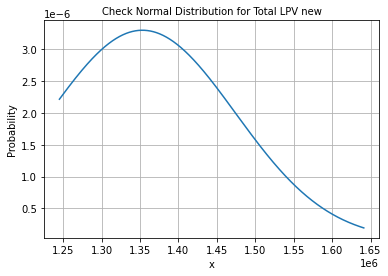

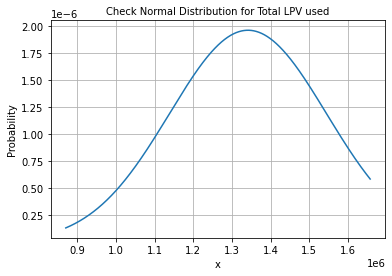

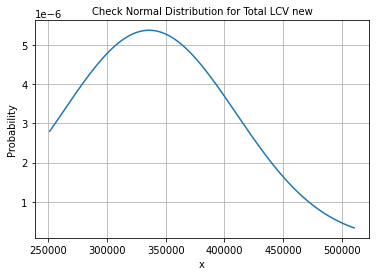

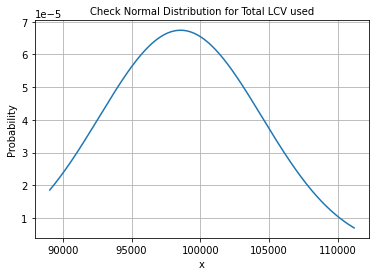

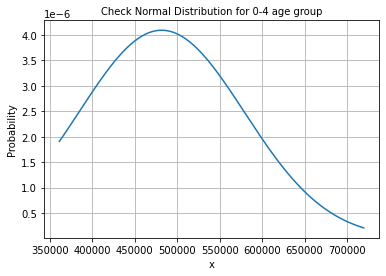

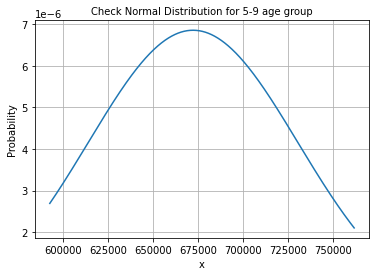

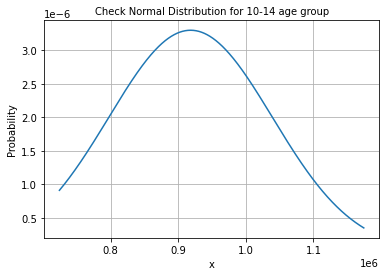

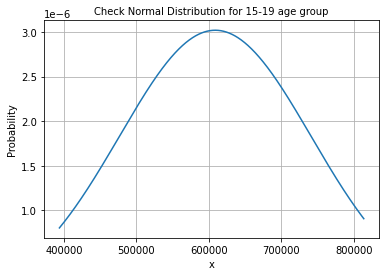

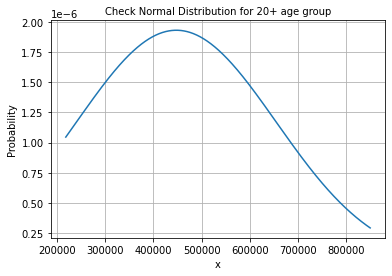

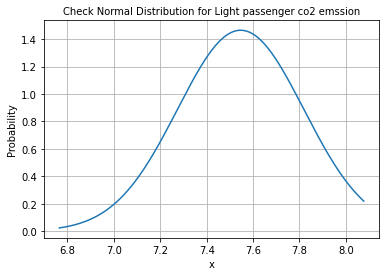

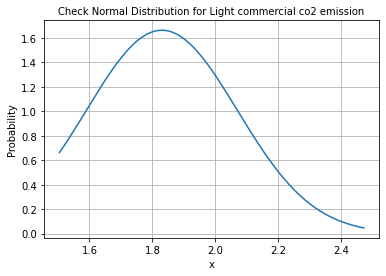

In [6]:
# ---- step 2.4.2 ----
step_2_4_2_check_normality(number_fleets_df, light_fleet_age_df, co2_emission_df)

In [7]:
 # ---- step 3.1 ----
num_fleets_select_cols = ['Period', 'Total light new', 'Total light used import', 'Total LPV new',
                              ' Total LPV used', 'Total LCV new', ' Total LCV used', 'Light passenger NZ new',
                              'Light passenger used import', 'Light commercial NZ New',
                              'Light commercial used import', 'Light fleet average age', 'Light passenger average age',
                              'Light commercial average age', 'Light used average age', 'NZ new light average age']
new_age_distribution_df = step_3_1_clean_light_age_distribution(light_fleet_age_df)
co2_select_cols = ['Light passenger', 'Light commercial']

In [8]:
# ---- step 3.2 ----
num_fleets_select_cols = ['Period', 'Total LPV new', ' Total LPV used', 'Total LCV new', ' Total LCV used',
                          'Light passenger average age', 'Light commercial average age']

percentage_columns = ['0-4 years percentage', '5-9 years  percentage','10-14 years percentage',
                      '15-19 years percentage', '20+ years percentage', '15+ years percentage']

In [9]:
# ---- step 3.3 ----
nums_columns = ['Total LPV new', ' Total LPV used', 'Total LCV new', ' Total LCV used']
new_age_distribution_df = step_3_3_construct_new_distribution_df(nums_columns, percentage_columns,
                                                                 number_fleets_df, new_age_distribution_df)
# new_age_distribution_df

In [10]:
# ---- step 3.4 ----
cleaned_data_df = pd.concat([number_fleets_df[num_fleets_select_cols], new_age_distribution_df,co2_emission_df[co2_select_cols]], axis=1)
# cleaned_data_df

In [11]:
# ---- step 3.5 ----
cleaned_data_df = step_3_5_convert_object_to_int(cleaned_data_df)

sparkdf = spark.createDataFrame(cleaned_data_df)
sparkdf.printSchema()

root
 |-- Period: long (nullable = true)
 |-- Total LPV new: long (nullable = true)
 |--  Total LPV used: long (nullable = true)
 |-- Total LCV new: long (nullable = true)
 |--  Total LCV used: long (nullable = true)
 |-- Light passenger average age: double (nullable = true)
 |-- Light commercial average age: double (nullable = true)
 |-- 0-4 years of LPV new: long (nullable = true)
 |-- 5-9 years of LPV new: long (nullable = true)
 |-- 10-14 years of LPV new: long (nullable = true)
 |-- 15-19 years of LPV new: long (nullable = true)
 |-- 20+ years of LPV new: long (nullable = true)
 |-- 15+ years of LPV new: long (nullable = true)
 |-- 0-4 years of LPV used: long (nullable = true)
 |-- 5-9 years of LPV used: long (nullable = true)
 |-- 10-14 years of LPV used: long (nullable = true)
 |-- 15-19 years of LPV used: long (nullable = true)
 |-- 20+ years of LPV used: long (nullable = true)
 |-- 15+ years of LPV used: long (nullable = true)
 |-- 0-4 years of LCV new: long (nullable = true)


In [12]:
# ---- step 4.1 ----
# run PCA to select features
# step_4_1_LPV_cols(cleaned_data_df)
# step_4_1_LCV_cols(cleaned_data_df)

In [13]:
# ---- step 4.1 ----
reduced_LPV_cols = ['Total LPV new', ' Total LPV used', 'Light passenger average age','0-4 years of LPV new', '5-9 years of LPV new', 
                    '10-14 years of LPV new', '15-19 years of LPV new', '20+ years of LPV new', '0-4 years of LPV used', 
                    '5-9 years of LPV used', '10-14 years of LPV used', '15-19 years of LPV used', '20+ years of LPV used', 
                    'Light passenger']

reduced_LCV_cols = ['Total LCV new', ' Total LCV used', 'Light commercial average age', '0-4 years of LCV new', '5-9 years of LCV new',
                    '10-14 years of LCV new', '15-19 years of LCV new', '20+ years of LCV new', '0-4 years of LCV used', 
                    '5-9 years of LCV used', '10-14 years of LCV used', '15-19 years of LCV used', '20+ years of LCV used', 
                    'Light commercial']


In [14]:
# ---- step 4.2 ----
# example of normalization
# LPV_df, LCV_df = step_4_2_normalization(cleaned_data_df,reduced_LPV_cols,reduced_LCV_cols)
LPV_df, LCV_df = cleaned_data_df[reduced_LPV_cols],cleaned_data_df[reduced_LCV_cols]

In [15]:
# ---- step 5 ----
# explained match objectives with machine learning algorithms in report

In [16]:
# ---- step 6 ----
# LPV_train_data,LPV_test_data = assemble_dataset(LPV_df,SEED)
# LCV_train_data,LCV_test_data = assemble_dataset(LCV_df,SEED)

# print('LPV training set:')
# LPV_train_data.show()
# print('LPV testing set:')
# LPV_test_data.show()
# print('LCV training set:')
# LCV_train_data.show()
# print('LCV testing set:')
# LCV_test_data.show()

In [17]:
# ---- step 6 ----
# print('Vertify LPV DT')
# step_6_vertify_dt(LPV_train_data, LPV_test_data, 'Light passenger')

# print('Vertify LCV DT')
# step_6_vertify_dt(LCV_train_data, LCV_test_data, 'Light commercial')

In [18]:
# regParam_list = [0.01, 0.1, 0.35, 0.5, 1]

# for i in regParam_list:
#     _,_,LPV_r2 = ridge_regressor(LPV_train_data, LPV_test_data,'Light passenger',i)
#     _,_,LCV_r2 = ridge_regressor(LCV_train_data, LCV_test_data,'Light commercial',i)
    
#     print('regparam = %f, LPV r2 = %.4f, LCV r2 = %.4f'%(i, LPV_r2, LCV_r2) )

In [19]:
# ---- step 7 ----
LPV_train_data,LPV_test_data = step_7_1_assemble_dataset(LPV_df,SEED)
LCV_train_data,LCV_test_data = step_7_1_assemble_dataset(LCV_df,SEED)

print('LPV training set:')
LPV_train_data.show()
print('LPV testing set:')
LPV_test_data.show()
print('LCV training set:')
LCV_train_data.show()
print('LCV testing set:')
LCV_test_data.show()

LPV training set:
+--------------------+------------------+
|            features|   Light passenger|
+--------------------+------------------+
|[1276498.0,870680...| 7.546587059314116|
|[1245805.0,104614...| 7.066370322830001|
|[1256293.0,956915...|6.7652905591999986|
|[1249158.0,124136...|      7.6710458805|
|[1257339.0,132088...|     7.54950688585|
|[1267476.0,136391...|     7.64481448926|
|[1280762.0,139831...| 7.796914139070001|
|[1292558.0,140014...|      7.6925282202|
|[1294924.0,138966...| 7.626856430539999|
|[1306995.0,139813...| 7.697161857649999|
|[1350457.0,138591...|7.4447752306599995|
|[1479943.0,149908...|7.6621237544300005|
|[1535175.0,155653...| 7.800259903390001|
|[1590094.0,161762...|     8.07740664325|
|[1641232.0,165719...| 7.546587059314116|
|[0.0,0.0,0.0,0.0,...|               0.0|
|[0.0,0.0,0.0,0.0,...|               0.0|
|[0.0,0.0,0.0,0.0,...|               0.0|
+--------------------+------------------+

LPV testing set:
+--------------------+-----------------+

In [20]:
split_2017_LPV_rows = [[1.59009400e+06, 1.61762700e+06, 1.43115413e+01, 2.84522000e+05, 2.54697000e+05,
                        4.53646000e+05, 2.51078000e+05, 3.46148000e+05, 2.89449000e+05, 2.59108000e+05,
                        4.61501000e+05, 2.55426000e+05, 3.52141000e+05],
                       [284522.0, 0.0, 2.975101564, 284522.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [254697.0, 0.0, 7.975101564, 0.0, 254697.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [453646.0, 0.0, 12.97510156, 0.0, 0.0, 453646.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [251078.0, 0.0, 17.97510156, 0.0, 0.0, 0.0, 251078.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [346148.0, 0.0, 22.97510156, 0.0, 0.0, 0.0, 0.0, 346148.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [0.0, 289449.0, 9.130000000, 0.0, 0.0, 0.0, 0.0, 0.0, 289449.0, 0.0, 0.0, 0.0, 0.0],
                       [0.0, 259108.0, 14.13000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 259108.0, 0.0, 0.0, 0.0],
                       [0.0, 461501.0, 19.13000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 461501.0, 0.0, 0.0],
                       [0.0, 255426.0, 24.13000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 255426.0, 0.0],
                       [0.0, 352141.0, 29.13000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 352141.0], ]

split_2017_LCV_rows = [[4.76173000e+05, 1.06367000e+05, 1.25145441e+01, 8.52030000e+04, 7.62720000e+04,
                        1.35849000e+05, 7.51880000e+04, 1.03658000e+05, 1.90320000e+04, 1.70370000e+04,
                        3.03460000e+04, 1.67950000e+04, 2.31550000e+04],
                       [085203.0, 0.0, 2.868356783, 085203.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [076272.0, 0.0, 7.868356783, 0.0, 076272.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [135849.0, 0.0, 12.86835678, 0.0, 0.0, 135849.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [075188.0, 0.0, 17.86835678, 0.0, 0.0, 0.0, 075188.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [103658.0, 0.0, 22.86835678, 0.0, 0.0, 0.0, 0.0, 103658.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [0.0, 019032.0, 07.98000000, 0.0, 0.0, 0.0, 0.0, 0.0, 019032.0, 0.0, 0.0, 0.0, 0.0],
                       [0.0, 017037.0, 12.98000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 017037.0, 0.0, 0.0, 0.0],
                       [0.0, 030346.0, 17.98000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 030346.0, 0.0, 0.0],
                       [0.0, 016795.0, 22.98000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 016795.0, 0.0],
                       [0.0, 023155.0, 27.98000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 023155.0], ]

In [42]:
for idx,i in enumerate(reduced_LPV_cols[:-1]):
    print('%s : %f' % (i, split_2017_LPV_rows[0][idx]) )

Total LPV new : 1590094.000000
 Total LPV used : 1617627.000000
Light passenger average age : 14.311541
0-4 years of LPV new : 284522.000000
5-9 years of LPV new : 254697.000000
10-14 years of LPV new : 453646.000000
15-19 years of LPV new : 251078.000000
20+ years of LPV new : 346148.000000
0-4 years of LPV used : 289449.000000
5-9 years of LPV used : 259108.000000
10-14 years of LPV used : 461501.000000
15-19 years of LPV used : 255426.000000
20+ years of LPV used : 352141.000000


In [43]:
for idx,i in enumerate(reduced_LCV_cols[:-1]):
    print('%s : %f' % (i, split_2017_LCV_rows[0][idx]) )

Total LCV new : 476173.000000
 Total LCV used : 106367.000000
Light commercial average age : 12.514544
0-4 years of LCV new : 85203.000000
5-9 years of LCV new : 76272.000000
10-14 years of LCV new : 135849.000000
15-19 years of LCV new : 75188.000000
20+ years of LCV new : 103658.000000
0-4 years of LCV used : 19032.000000
5-9 years of LCV used : 17037.000000
10-14 years of LCV used : 30346.000000
15-19 years of LCV used : 16795.000000
20+ years of LCV used : 23155.000000


In [21]:
LPV_2017_df = spark.createDataFrame([ [Vectors.dense(i)] for i in split_2017_LPV_rows ],["features"])
LCV_2017_df = spark.createDataFrame([ [Vectors.dense(i)] for i in split_2017_LCV_rows ],["features"])

print('LPV 2017 obj 2 splitted data')
LPV_2017_df.show()
print('LV 2017 obj 2 splitted data')
LCV_2017_df.show()

LPV 2017 obj 2 splitted data
+--------------------+
|            features|
+--------------------+
|[1590094.0,161762...|
|[284522.0,0.0,2.9...|
|[254697.0,0.0,7.9...|
|[453646.0,0.0,12....|
|[251078.0,0.0,17....|
|[346148.0,0.0,22....|
|[0.0,289449.0,9.1...|
|[0.0,259108.0,14....|
|[0.0,461501.0,19....|
|[0.0,255426.0,24....|
|[0.0,352141.0,29....|
+--------------------+

LV 2017 obj 2 splitted data
+--------------------+
|            features|
+--------------------+
|[476173.0,106367....|
|[85203.0,0.0,2.86...|
|[76272.0,0.0,7.86...|
|[135849.0,0.0,12....|
|[75188.0,0.0,17.8...|
|[103658.0,0.0,22....|
|[0.0,19032.0,7.98...|
|[0.0,17037.0,12.9...|
|[0.0,30346.0,17.9...|
|[0.0,16795.0,22.9...|
|[0.0,23155.0,27.9...|
+--------------------+



In [22]:
# ---- step 7.2 objective 1 ----
LPV_train_data.printSchema()
LPV_test_data.printSchema()
LCV_train_data.printSchema()
LCV_test_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Light passenger: double (nullable = true)

root
 |-- features: vector (nullable = true)
 |-- Light passenger: double (nullable = true)

root
 |-- features: vector (nullable = true)
 |-- Light commercial: double (nullable = true)

root
 |-- features: vector (nullable = true)
 |-- Light commercial: double (nullable = true)



In [23]:
# ---- step 7.2 objective 1 ----
LPV_predictions, LPV_residuals, LPV_r2, LPV_model = ridge_regressor(LPV_train_data, LPV_test_data,'Light passenger', 0.1)
LCV_predictions, LCV_residuals, LCV_r2, LCV_model = ridge_regressor(LCV_train_data, LCV_test_data,'Light commercial', 0.1)

In [24]:
print('Data Mining Objective One')
print('LPV R2 score = %f, LCV R2 score = %f'%(LPV_r2, LCV_r2))

Data Mining Objective One
LPV R2 score = 0.998174, LCV R2 score = 0.998793


In [25]:
print('LPV objective one results')
LPV_predictions.show()
LPV_residuals.show()
print('LCV objective one results')
LCV_predictions.show()
LCV_residuals.show()

LPV objective one results
+--------------------+-----------------+-------------------+
|            features|  Light passenger|         prediction|
+--------------------+-----------------+-------------------+
|[1245233.0,114948...|7.375727557739999|   7.38886035344829|
|[1315826.0,138233...|7.575257564359999| 7.5447334786043045|
|[1389608.0,140493...|    7.41518700798|  7.688787765854149|
|[1434731.0,144919...|    7.43075356143|  7.736590929673956|
|[0.0,0.0,0.0,0.0,...|              0.0|0.03749330012153006|
|[0.0,0.0,0.0,0.0,...|              0.0|0.03749330012153006|
|[0.0,0.0,0.0,0.0,...|              0.0|0.03749330012153006|
+--------------------+-----------------+-------------------+

+--------------------+
|           residuals|
+--------------------+
|-0.01313279570829...|
|0.030524085755694763|
| -0.2736007578741484|
| -0.3058373682439557|
|-0.03749330012153006|
|-0.03749330012153006|
|-0.03749330012153006|
+--------------------+

LCV objective one results
+--------------------+

In [26]:
#  ---- step 7.2 objective 2 ----
LPV_2017_df.printSchema()
LCV_2017_df.printSchema()

root
 |-- features: vector (nullable = true)

root
 |-- features: vector (nullable = true)



In [27]:
#  ---- step 7.2 objective 2 ----
LPV_2017_predictions, LPV_2017_predvalues, LPV_2017_real, LPV_2017_predict = step_7_2_objective2_model(LPV_model,  LPV_2017_df)
LCV_2017_predictions, LCV_2017_predvalues, LCV_2017_real, LCV_2017_predict = step_7_2_objective2_model(LCV_model, LCV_2017_df)

In [28]:
print('LPV 2017 real emission = %f, sum of single group prediction in 2017 = %f'%(LPV_2017_real, LPV_2017_predict) )
print('LCV 2017 real emission = %f, sum of single group prediction in 2017 = %f'%(LCV_2017_real, LCV_2017_predict) )

LPV 2017 real emission = 7.782557, sum of single group prediction in 2017 = 18.291243
LCV 2017 real emission = 2.160922, sum of single group prediction in 2017 = 5.418030


In [74]:
# ---- step 8.1 ----
LPV_columns = ['0-4 years of LPV new', '5-9 years of LPV new', '10-14 years of LPV new', '15-19 years of LPV new', '20+ years of LPV new', 
 '0-4 years of LPV used', '5-9 years of LPV used', '10-14 years of LPV used', '15-19 years of LPV used', '20+ years of LPV used']

LPV_percentage_list = []
print('LPV 2017 single group predictions')
for idx,i in enumerate(LPV_2017_predvalues[1:]):
    LPV_percentage_list.append( i/LPV_2017_predict)
    print('%s : %f ,contributed:  %f %%' %(columns[idx], i, i/LPV_2017_predict *100) )

LPV 2017 single group predictions
0-4 years of LCV new : 1.473137 ,contributed:  8.053784 %
5-9 years of LCV new : 1.863923 ,contributed:  10.190249 %
10-14 years of LCV new : 2.321547 ,contributed:  12.692122 %
15-19 years of LCV new : 2.300353 ,contributed:  12.576253 %
20+ years of LCV new : 1.429951 ,contributed:  7.817680 %
0-4 years of LCV used : 1.206645 ,contributed:  6.596845 %
5-9 years of LCV used : 1.720232 ,contributed:  9.404677 %
10-14 years of LCV used : 2.106328 ,contributed:  11.515502 %
15-19 years of LCV used : 2.273164 ,contributed:  12.427608 %
20+ years of LCV used : 1.595962 ,contributed:  8.725280 %


In [75]:
# ---- step 8.1 ----
LCV_columns = ['0-4 years of LCV new', '5-9 years of LCV new', '10-14 years of LCV new', '15-19 years of LCV new', '20+ years of LCV new', 
 '0-4 years of LCV used', '5-9 years of LCV used', '10-14 years of LCV used', '15-19 years of LCV used', '20+ years of LCV used']

LCV_percentage_list = []
print('LCV 2017 single group predictions')
for idx,i in enumerate(LCV_2017_predvalues[1:]):
    LCV_percentage_list.append( i/LCV_2017_predict)
    print('%s : %f ,contributed:  %f %%' %(columns[idx], i,i/LCV_2017_predict * 100) )

LCV 2017 single group predictions
0-4 years of LCV new : 0.249914 ,contributed:  4.612629 %
5-9 years of LCV new : 0.477053 ,contributed:  8.804919 %
10-14 years of LCV new : 0.357675 ,contributed:  6.601561 %
15-19 years of LCV new : 0.701987 ,contributed:  12.956495 %
20+ years of LCV new : 0.733979 ,contributed:  13.546962 %
0-4 years of LCV used : 0.365656 ,contributed:  6.748880 %
5-9 years of LCV used : 0.456571 ,contributed:  8.426886 %
10-14 years of LCV used : 0.457761 ,contributed:  8.448852 %
15-19 years of LCV used : 0.719705 ,contributed:  13.283511 %
20+ years of LCV used : 0.897730 ,contributed:  16.569303 %


In [70]:
# ---- step 8.2 ----
import seaborn as sns

LPV_test_real_pred = {'real_value':[i for i in LPV_test_data.toPandas()['Light passenger']],
                      'pred_value':[i.prediction for i in LPV_predictions.select('prediction').collect()]}

LPV_test_real_pred_df = pd.DataFrame(LPV_test_real_pred)

LCV_test_real_pred = {'real_value':[i for i in LCV_test_data.toPandas()['Light commercial']],
                      'pred_value':[i.prediction for i in LCV_predictions.select('prediction').collect()]}

LCV_test_real_pred_df = pd.DataFrame(LCV_test_real_pred)

sns.set_theme(color_codes=True)

<AxesSubplot:xlabel='real_value', ylabel='pred_value'>

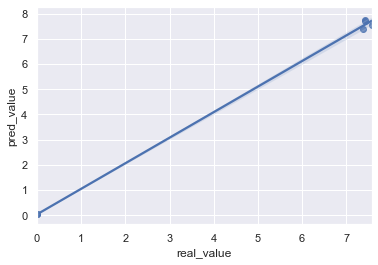

In [71]:
sns.regplot(x="real_value", y="pred_value", data=LPV_test_real_pred_df)

<AxesSubplot:xlabel='real_value', ylabel='pred_value'>

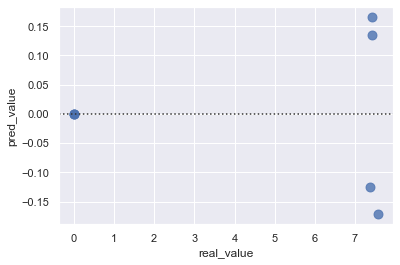

In [68]:
sns.residplot(x="real_value", y="pred_value", data=LPV_test_real_pred_df, scatter_kws={"s": 80})

<AxesSubplot:xlabel='real_value', ylabel='pred_value'>

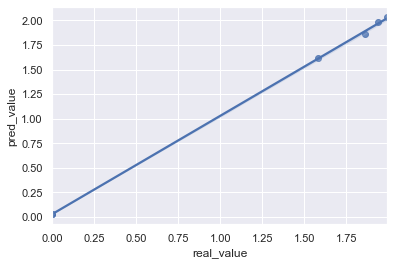

In [72]:
sns.regplot(x="real_value", y="pred_value", data=LCV_test_real_pred_df)

<AxesSubplot:xlabel='real_value', ylabel='pred_value'>

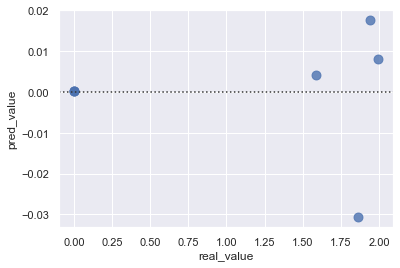

In [73]:
sns.residplot(x="real_value", y="pred_value", data=LCV_test_real_pred_df, scatter_kws={"s": 80})

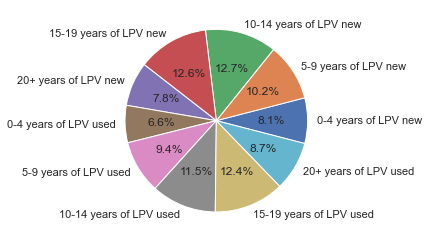

In [77]:
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)

ratios = LPV_percentage_list
labels = LPV_columns
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, )
plt.show()

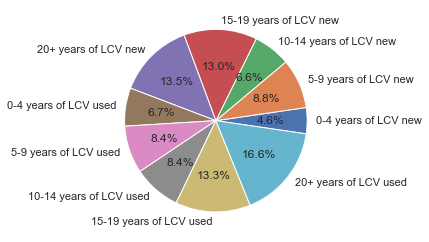

In [78]:
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)

ratios = LCV_percentage_list
labels = LCV_columns
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, )
plt.show()

In [30]:
# from pyspark.ml.regression import GeneralizedLinearRegression

# lr = GeneralizedLinearRegression(labelCol='Light passenger',family="tweedie", link="identity", maxIter=10, regParam=0.1)

# from pyspark.ml.regression import IsotonicRegression
# lr = IsotonicRegression(labelCol='Light passenger')

# from pyspark.ml.regression import AFTSurvivalRegression

# quantileProbabilities = [0.3, 0.6]
# lr = AFTSurvivalRegression(labelCol='Light passenger', quantileProbabilities=quantileProbabilities,
#                             quantilesCol="quantiles")